## Erik Bayerlein - 537606

In [51]:
import numpy as np
import matplotlib.pyplot as plt

## Optimization Algorithms

#### Auxiliary Algorithms

In [52]:
def zscore_norm(dataset):
    n = dataset.shape[0]
    mu = 1/n * np.sum(dataset, axis=0)
    sigma = np.sqrt(1/(n-1) * np.sum((dataset - mu)**2, axis=0))
    return (dataset - mu) / sigma

In [53]:
MSE = lambda y_hat, y, n: (1/n) * np.sum((y - y_hat) ** 2, axis=0)

#### Ordinary Least Squares (OLS)

In [25]:
def ols(
    x: np.ndarray,
    y: np.ndarray
):
    x_trans = x.T
    return np.linalg.inv(x_trans @ x) @ x_trans @ y

#### Gradient Descent (GD)

In [54]:
def gradient_descent(
    x: np.ndarray,
    y: np.ndarray,
    iterations: int,
    alpha: float = 0.1
):
    x = np.asanyarray(x).reshape(-1)
    y = np.asanyarray(y).reshape(-1)

    w0 = 1.0
    w1 = 1.0

    n = y.size
    w_history = []
    mse_history = []

    for _ in range(iterations):
        y_hat = w0 + w1*x
        error = y - y_hat

        w0 += alpha * 1/n * np.sum(error, axis=0)
        w1 += alpha * 1/n * np.sum(error * x, axis=0)

        y_hat = w0 + w1 * x

        w_history.append([w0, w1])
        mse_history.append(MSE(y_hat, y, n))

    return np.array(w_history), np.array(mse_history)

#### Stochastic Gradient Descent (SGD)

------------

### Q1

#### a) OLS + MSE

Parameters

In [31]:
data = np.genfromtxt('../../datasets/artificial1d.csv', delimiter=',')
data

array([[-1.        , -2.08201726],
       [-0.93103448, -1.32698023],
       [-0.86206897, -1.10559772],
       [-0.79310345, -0.87394576],
       [-0.72413793, -0.28502695],
       [-0.65517241, -0.43115252],
       [-0.5862069 , -0.79475402],
       [-0.51724138, -0.88606806],
       [-0.44827586, -0.89989978],
       [-0.37931034, -0.86184365],
       [-0.31034483, -0.88805183],
       [-0.24137931, -1.23595129],
       [-0.17241379, -0.71956827],
       [-0.10344828, -0.45202286],
       [-0.03448276,  0.09889951],
       [ 0.03448276,  0.34896973],
       [ 0.10344828,  0.09747797],
       [ 0.17241379,  0.70019809],
       [ 0.24137931,  1.31051213],
       [ 0.31034483,  1.00177576],
       [ 0.37931034,  1.00318231],
       [ 0.44827586,  1.14910129],
       [ 0.51724138,  1.59220607],
       [ 0.5862069 ,  0.60909009],
       [ 0.65517241,  0.59441623],
       [ 0.72413793,  0.70300732],
       [ 0.79310345,  0.82332241],
       [ 0.86206897,  1.10646439],
       [ 0.93103448,

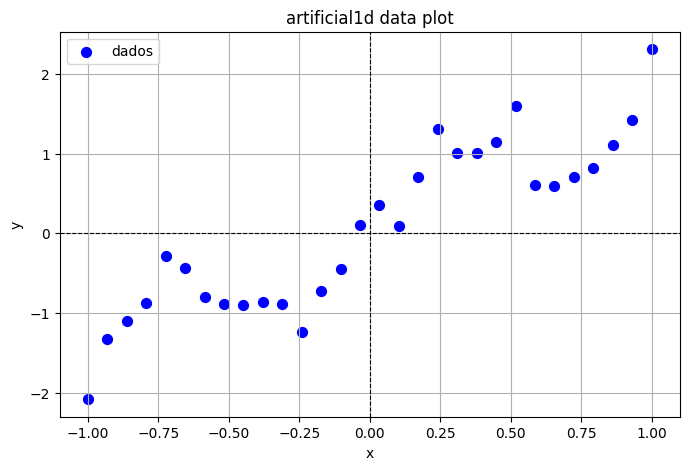

In [32]:
x = data[:,0]
y = data[:,1]

plt.figure(figsize=(8,5))
plt.scatter(x, y, color="blue", s=50, label="dados")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("artificial1d data plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

It's necessary to normalize the parameters before the training

In [ ]:
normalized_data = zscore_norm(data)

x = np.c_[np.ones(normalized_data.shape[0]).T, normalized_data[:, [0]]]
y = normalized_data[:, [1]]

w = ols(x, y)
y_hat = x @ w

mse = MSE(y_hat, y, y_hat.shape[0])
mse

array([0.1880212])

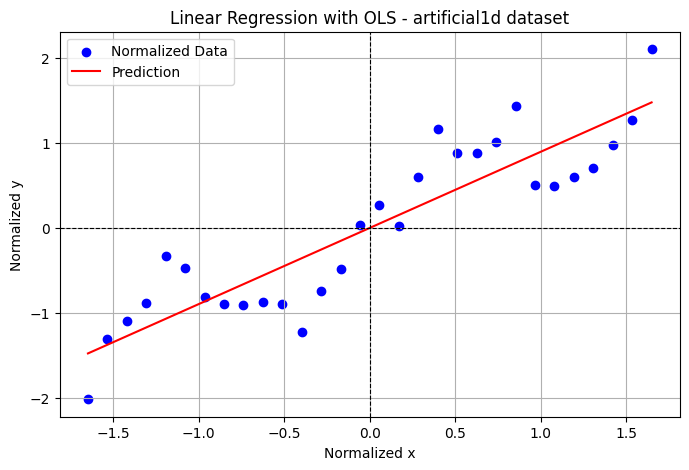

In [79]:
plt.figure(figsize=(8,5))
plt.scatter(normalized_data[:,0], y, color="blue", label="Normalized Data")
plt.plot(normalized_data[:,0], y_hat, color="red", label="Prediction")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("Linear Regression with OLS - artificial1d dataset")
plt.xlabel("Normalized x")
plt.ylabel("Normalized y")
plt.legend()
plt.grid(True)
plt.show()

#### b) GD + MSE

In [70]:
data = np.genfromtxt('../../datasets/artificial1d.csv', delimiter=',')
data

array([[-1.        , -2.08201726],
       [-0.93103448, -1.32698023],
       [-0.86206897, -1.10559772],
       [-0.79310345, -0.87394576],
       [-0.72413793, -0.28502695],
       [-0.65517241, -0.43115252],
       [-0.5862069 , -0.79475402],
       [-0.51724138, -0.88606806],
       [-0.44827586, -0.89989978],
       [-0.37931034, -0.86184365],
       [-0.31034483, -0.88805183],
       [-0.24137931, -1.23595129],
       [-0.17241379, -0.71956827],
       [-0.10344828, -0.45202286],
       [-0.03448276,  0.09889951],
       [ 0.03448276,  0.34896973],
       [ 0.10344828,  0.09747797],
       [ 0.17241379,  0.70019809],
       [ 0.24137931,  1.31051213],
       [ 0.31034483,  1.00177576],
       [ 0.37931034,  1.00318231],
       [ 0.44827586,  1.14910129],
       [ 0.51724138,  1.59220607],
       [ 0.5862069 ,  0.60909009],
       [ 0.65517241,  0.59441623],
       [ 0.72413793,  0.70300732],
       [ 0.79310345,  0.82332241],
       [ 0.86206897,  1.10646439],
       [ 0.93103448,

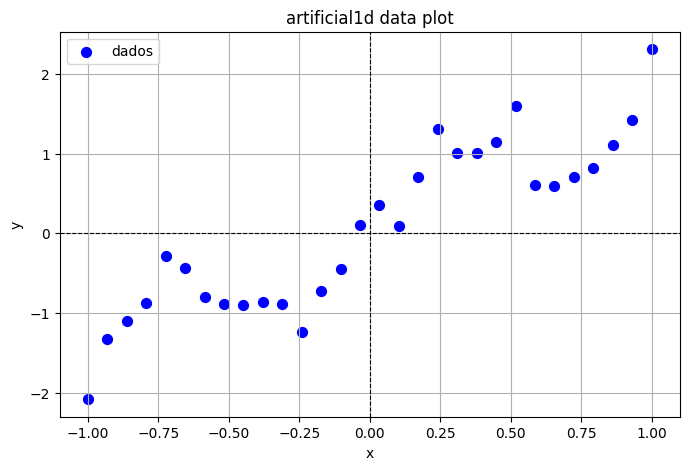

In [71]:
x = data[:,0]
y = data[:,1]

plt.figure(figsize=(8,5))
plt.scatter(x, y, color="blue", s=50, label="dados")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("artificial1d data plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [83]:
normalized_data = zscore_norm(data)

x = normalized_data[:, 0]
y = normalized_data[:, 1]

iters = 200
alpha = 0.15

w_hist, mse_hist = gradient_descent(x, y, iterations=iters, alpha=alpha)
print(f"MSE found: {mse_hist[-1]}")

MSE found: 0.1880211971004868


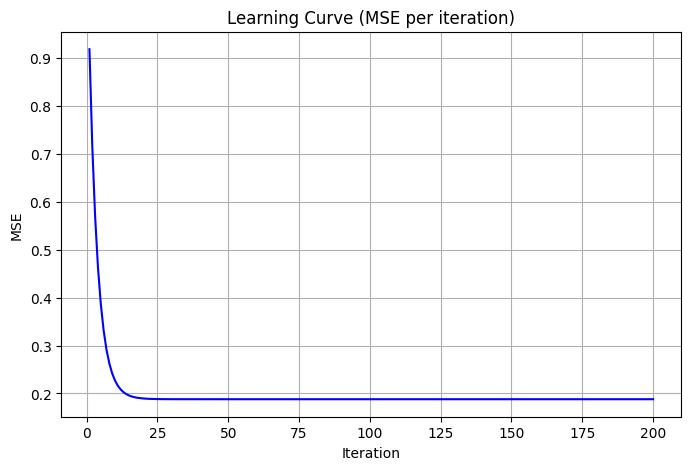

In [73]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(1, iters+1), mse_hist, color="blue")
plt.title("Learning Curve (MSE per iteration)")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

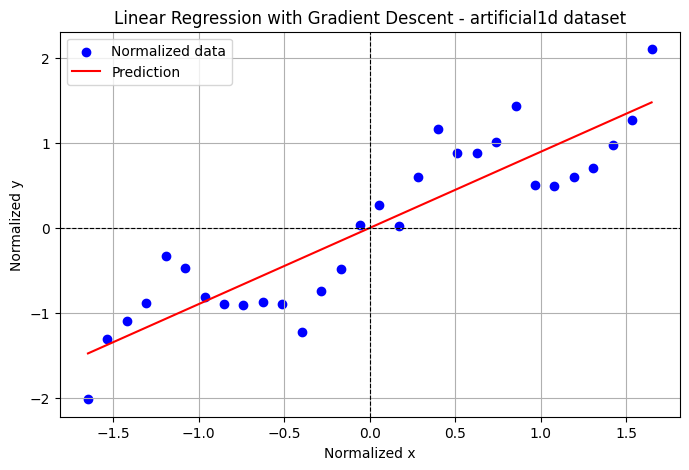

In [78]:
w0_final, w1_final = w_hist[-1]
plt.figure(figsize=(8,5))
plt.scatter(x, y, color="blue", label="Normalized data")
plt.plot(x, w0_final + w1_final * x, color="red", label="Prediction")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("Linear Regression with Gradient Descent - artificial1d dataset")
plt.xlabel("Normalized x")
plt.ylabel("Normalized y")
plt.legend()
plt.grid(True)
plt.show()

#### c) SGD + MSE